<a href="https://colab.research.google.com/github/Marcysp/PCVK_Ganjil_2023/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import library

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. membuat fungsi dilasi serta menampilkan hasil dilasi dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV,

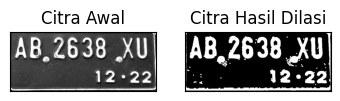

In [71]:
#Dilasi Tanpa Library

def dilasi_citra(F,w) :
  #size image
  p,q = F.shape

  imgD = np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED = np.ones((w,w), dtype=np.uint8)
  constant1 = (w-1)//2

  #Proses dilasi
  for i in range(constant1, p - constant1):
    for j in range(constant1, q-constant1):
      temp = F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product = temp*SED
      imgD[i,j] = np.max(product)
  return imgD

img_d = cv2.imread('/content/drive/MyDrive/PCVK_sem5/AB2638XU.jpg',0)
# menaikkan kepekatan warna menggunakan gama correction
gamma_image = np.zeros(img_d.shape, img_d.dtype)

for y in range(img_d.shape[0]):
  for x in range(img_d.shape[1]):
      gamma_image[y,x] = np.clip(255.0 * (img_d[y,x] / 255.0) ** (2 / 1), 0, 255)

ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'),plt.xticks([]), plt.yticks([])
plt.show()

4. membuat program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:

[[1 1 1]
 [1 1 1]
 [1 1 1]]


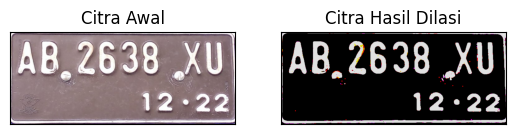

In [33]:
img = cv2.imread('/content/drive/MyDrive/PCVK_sem5/AB2638XU.jpg')

# menaikkan kepekatan warna menggunakan gama correction
gamma_image = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]):
  for x in range(img.shape[1]):
      gamma_image[y,x] = np.clip(255.0 * (img[y,x] / 255.0) ** (2 / 1), 0, 255)

#img = cv2.imread('morp.jpg',0)
ret, thresh = cv2.threshold(gamma_image, 210, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)

print(kernel)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:

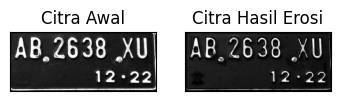

In [99]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def erosi_citra(F, k):
    # size image
    m, n = F.shape

    # Generate structure element erosi (SE)
    SE = np.ones((k, k), dtype=np.uint8)
    constant = (k - 1) // 2

    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses erosi
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

img_e = cv2.imread('/content/drive/MyDrive/PCVK_sem5/AB2638XU.jpg', 0)
# menaikkan kepekatan warna menggunakan gama correction
gamma_image = np.zeros(img_e.shape, img_e.dtype)

for y in range(img_e.shape[0]):
    for x in range(img_e.shape[1]):
        gamma_image[y, x] = np.clip(255.0 * (img_e[y, x] / 255.0) ** (3 / 1), 0, 255)

k = 5
imgE = erosi_citra(gamma_image, k)

plt.subplot(131), plt.imshow(gamma_image, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()


6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV,

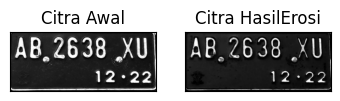

In [100]:
#EROSI LIBRARY
img = cv2.imread('/content/drive/MyDrive/PCVK_sem5/AB2638XU.jpg', 0)
# menaikkan kepekatan warna menggunakan gama correction
gamma_image = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]):
  for x in range(img.shape[1]):
      gamma_image[y,x] = np.clip(255.0 * (img[y,x] / 255.0) ** (3 / 1), 0, 255)

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(gamma_image,kernel,iterations = 1)

plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(erosion,cmap = 'gray'),plt.title('Citra HasilErosi')
plt.xticks([]), plt.yticks([])
plt.show()


7.1 Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:
Operasi Opening Menggunakan tanpa Library Morphology


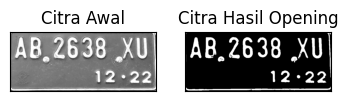

In [101]:
img_o= cv2.imread('/content/drive/MyDrive/PCVK_sem5/AB2638XU.jpg',0) #
# menaikkan kepekatan warna menggunakan gama correction
gamma_image = np.zeros(img.shape, img.dtype)

for y in range(img_o.shape[0]):
  for x in range(img_o.shape[1]):
      gamma_image[y,x] = np.clip(255.0 * (img_o[y,x] / 255.0) ** (3 / 1), 0, 255)

reto, thresho = cv2.threshold(gamma_image, 127, 225,cv2.THRESH_BINARY)
k=3
imgO = dilasi_citra(erosi_citra(thresho,k),k)
plt.subplot(131),plt.imshow(img_o,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

7.2 Operasi Opening Menggunakan Library Morphology

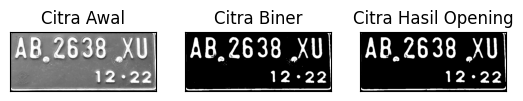

In [102]:
#Dengan Menggunakan Library
img = cv2.imread('/content/drive/MyDrive/PCVK_sem5/AB2638XU.jpg',0)

# menaikkan kepekatan warna menggunakan gama correction
gamma_image = np.zeros(img.shape, img.dtype)

for y in range(img_o.shape[0]):
  for x in range(img_o.shape[1]):
      gamma_image[y,x] = np.clip(255.0 * (img_o[y,x] / 255.0) ** (3 / 1), 0, 255)

ret, thresh = cv2.threshold(gamma_image, 127, 225, cv2.THRESH_BINARY)

kernel = np.ones((3,3),np.uint8)

openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]),
plt.yticks([])
plt.show()


8.1 buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:
operasi closing tanpa library morphology

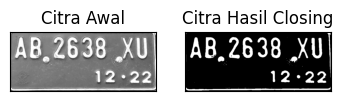

In [105]:
# Tanpa library

img_c = cv2.imread('/content/drive/MyDrive/PCVK_sem5/AB2638XU.jpg',0)
# menaikkan kepekatan warna menggunakan gama correction
gamma_image = np.zeros(img_c.shape, img_c.dtype)

for y in range(img_c.shape[0]):
  for x in range(img_c.shape[1]):
      gamma_image[y,x] = np.clip(255.0 * (img_c[y,x] / 255.0) ** (3 / 1), 0, 255)

retc, threshc = cv2.threshold(gamma_image, 127, 225,
cv2.THRESH_BINARY)
k=3
imgC = erosi_citra(dilasi_citra(threshc,k),k)

plt.subplot(131),plt.imshow(img_c,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]),
plt.yticks([])
plt.show()


In [ ]:
# Dengan Library morphology

img = cv2.imread('/content/drive/MyDrive/PCVK_sem5/AB2638XU.jpg',0)

# menaikkan kepekatan warna menggunakan gama correction
gamma_image = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]):
  for x in range(img.shape[1]):
      gamma_image[y,x] = np.clip(255.0 * (img[y,x] / 255.0) ** (3 / 1), 0, 255)

ret, thresh = cv2.threshold(gamma_image, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()